In [1]:
from recommend import Recommender
import matplotlib.pyplot as plt
import numpy as np
import bayespy.plot as bpplt
import pandas as pd

In [2]:
model = Recommender(sim=True)
result = model.fit(cluster_size=7)

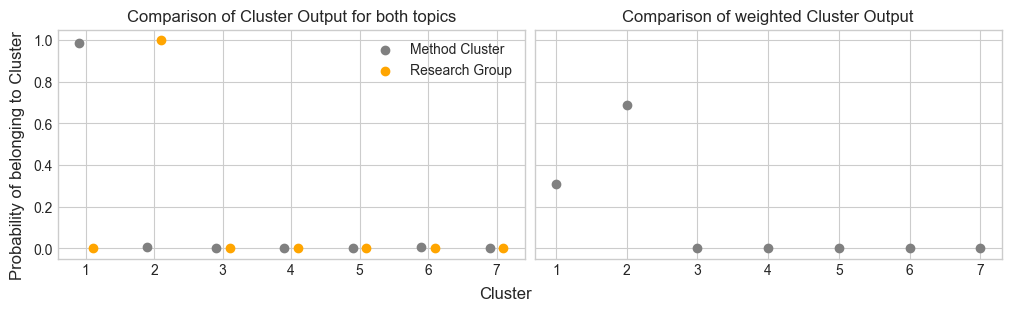

In [3]:
model.explainProbabilities(23)

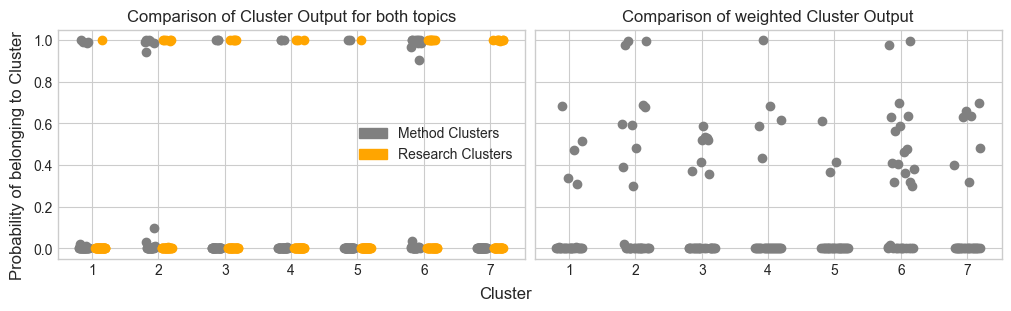

In [4]:
model.plotProbabilites()

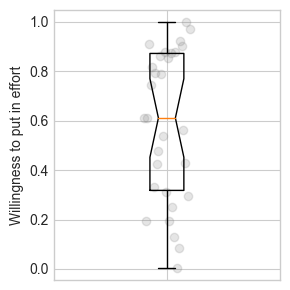

In [5]:
model.plotEffort()

In [6]:
# with plt.style.context("seaborn-whitegrid"):
#     fig, ax = plt.subplot_mosaic("B", tight_layout=True, figsize=(3, 3), sharey=True)
#     ax["B"].boxplot(
#         self._df.loc[:, self._effort_col],
#         notch=True,
#         flierprops=dict(markerfacecolor="b", marker="D"),
#     )
#     ax["B"].set_xticklabels("")
#     ax["B"].set_ylabel("Willingness to put in Effort")
#     x = np.linspace(.9, 1,1, len(self._df))
#     ax["B"].scatter(x, self._df.loc[:, self._effort_col])
#     plt.show()

In [7]:
weighted = result["weighted"]

In [8]:
weighted_df = pd.DataFrame(weighted)

In [9]:
print(weighted_df.shape[1])

7


In [10]:
weighted_df.round(5)

,0,1,2,3,4,5,6
0,0.00000,0.59570,0.00000,0.00000,0.00000,0.00482,0.39948
1,0.00000,0.38996,0.00022,0.00004,0.60976,0.00002,0.00000
2,0.00141,0.02167,0.00000,0.00000,0.00000,0.97692,0.00000
3,0.00877,0.97492,0.00000,0.00000,0.00000,0.01630,0.00001
4,0.00024,0.00008,0.37102,0.00002,0.00001,0.62863,0.00000
5,0.00002,0.00001,0.00000,0.58995,0.00000,0.41002,0.00000
6,0.00049,0.99833,0.00000,0.00000,0.00000,0.00118,0.00000
7,0.68246,0.00006,0.00000,0.00000,0.00000,0.31748,0.00000
8,0.00000,0.00025,0.00013,0.43586,0.00000,0.56367,0.00009
9,0.00000,0.00002,0.00000,0.99944,0.00000,0.00054,0.00000


weighted_df has n rows and j columns, with n being the number of persons and j being the number of groups
each cell contains the probablity of the person for the respective group
by iterativly adding the person with the highest probability to the respective group, we can ensure that the group size is not exceeded
and that the person is assigned to the group with the highest probability
this is done until all persons are assigned to a group

In [11]:
# weighted_df = pd.DataFrame(weighted)

# recommendations = {f"group {i}": {} for i in range(0, weighted_df.shape[1])}
# group_key = lambda group_num: f"group {int(group_num)}"

# min_group_size = 3
# max_group_size = 6
# total_participants = weighted_df.shape[0]
# added_participants = 0


# weighted_df_copy = weighted_df.copy()
# # round df to 5 decimals
# weighted_df_copy = weighted_df_copy#.round(5)

# for i in range(0, min_group_size):
#     for column in weighted_df_copy:
#         print("------")
#         print(column)
#         column_name = column
#         column_data = weighted_df[column]
#         # get indices of top n values
#         top_indices = column_data.nlargest(1).index
#         print(top_indices)
#         # get values of top n indices
#         top_values = column_data[top_indices].values
#         print(top_values)
#         # store in dict
#         recommendations[group_key(column_name)].update(dict(zip(top_indices, top_values)))
#         # set top n values to -100
#         weighted_df.loc[top_indices, column_name] = -100
#         added_participants += 1

# print(recommendations)

In [12]:
recommendations = {f"group {i}": [] for i in range(1, weighted_df.shape[1]+1)}
group_key = lambda group_num: f"group {int(group_num+1)}"
min_group_size = 3
max_group_size = 5
total_participants = weighted_df.shape[0]
added_participants = 0

todo_user = []
done_user = []

weighted_df_copy = weighted_df.copy()
# round df to 5 decimals
weighted_df_copy = weighted_df_copy.round(5)

for row_idx, row in weighted_df_copy.iterrows():
    # get index of max value
    max_idx = row.idxmax()

    # get value of max value
    max_val = float(row[max_idx])
    print(f"{row_idx}: max_idx: {max_idx}, max_val: {max_val}")

    if max_val < 0.65:
        print(f"{row_idx}: max_val < THRESHOLD")
        todo_user.append(row_idx)
        continue

    # check if group is full
    if len(recommendations[group_key(max_idx)]) >= max_group_size:
        print(f"{row_idx}: Group {max_idx} is full", len(recommendations[group_key(max_idx)]))
        n_th_group = 1
        new_max_idx = row.sort_values(ascending=False).index[n_th_group]
        while len(recommendations[group_key(new_max_idx)]) >= max_group_size:
            print(f"{row_idx}: Group {new_max_idx} is full", len(recommendations[group_key(new_max_idx)]))
            n_th_group += 1
            new_max_idx = row.sort_values(ascending=False).index[n_th_group]
        
        new_max_val = row[new_max_idx]
        max_val = new_max_val
        print(f"{row_idx}: max_idx: {new_max_idx}, max_val: {new_max_val}")
        
        max_idx = new_max_idx       

    done_user.append(row_idx) 


    recommendations[group_key(max_idx)].append((row_idx, max_val))
    # set max value to 0
    weighted_df_copy.loc[row_idx, max_idx] = 0

print(recommendations)
print(todo_user)

0: max_idx: 1, max_val: 0.5957
0: max_val < THRESHOLD
1: max_idx: 4, max_val: 0.60976
1: max_val < THRESHOLD
2: max_idx: 5, max_val: 0.97692
3: max_idx: 1, max_val: 0.97492
4: max_idx: 5, max_val: 0.62863
4: max_val < THRESHOLD
5: max_idx: 3, max_val: 0.58995
5: max_val < THRESHOLD
6: max_idx: 1, max_val: 0.99833
7: max_idx: 0, max_val: 0.68246
8: max_idx: 5, max_val: 0.56367
8: max_val < THRESHOLD
9: max_idx: 3, max_val: 0.99944
10: max_idx: 6, max_val: 0.63292
10: max_val < THRESHOLD
11: max_idx: 1, max_val: 0.5933
11: max_val < THRESHOLD
12: max_idx: 5, max_val: 0.6997
13: max_idx: 6, max_val: 0.66107
14: max_idx: 5, max_val: 0.58606
14: max_val < THRESHOLD
15: max_idx: 2, max_val: 0.51887
15: max_val < THRESHOLD
16: max_idx: 2, max_val: 0.58552
16: max_val < THRESHOLD
17: max_idx: 3, max_val: 0.68223
18: max_idx: 2, max_val: 0.53688
18: max_val < THRESHOLD
19: max_idx: 6, max_val: 0.63556
19: max_val < THRESHOLD
20: max_idx: 2, max_val: 0.52853
20: max_val < THRESHOLD
21: max_idx: 

In [13]:
# now we fill the recommendation dict up to the minimum group size based on the weighted_df (top per column, corresponding to the group_key)

for column in weighted_df_copy:
    if len(recommendations[group_key(column)]) >= min_group_size:
        continue
    print("------")
    print(column)
    column_name = column
    column_data = weighted_df[column]
    # get indices of top n values

    top_n = len(recommendations[group_key(column)]) - min_group_size + 1
    top_indices = column_data.nlargest(2).index

    print(top_indices)
    # get values of top n indices
    top_values = column_data[top_indices].values
    print(top_values)
    # store in dict
    for index, value in zip(top_indices, top_values):
        recommendations[group_key(column_name)].append((index, value))
    
    done_user.extend(top_indices)

print(recommendations)
print(done_user)
print(len(done_user))

------
0
Index([7, 28], dtype='int64')
[0.6824604  0.51455113]
------
2
Index([16, 18], dtype='int64')
[0.58551834 0.53687731]
------
3
Index([9, 17], dtype='int64')
[0.9994393  0.68223265]
------
4
Index([1, 16], dtype='int64')
[0.60975962 0.41434018]
------
6
Index([27, 13], dtype='int64')
[0.6999384  0.66106815]
{'group 1': [(7, 0.68246), (7, 0.6824604045665855), (28, 0.5145511265247686)], 'group 2': [(3, 0.97492), (6, 0.99833), (23, 0.68834), (25, 0.68024), (26, 0.99447)], 'group 3': [(16, 0.5855183416663535), (18, 0.5368773101720311)], 'group 4': [(9, 0.99944), (17, 0.68223), (9, 0.9994392978329325), (17, 0.6822326544881849)], 'group 5': [(1, 0.6097596166553849), (16, 0.41434017873363466)], 'group 6': [(2, 0.97692), (12, 0.6997), (24, 0.99575)], 'group 7': [(13, 0.66107), (27, 0.69994), (27, 0.6999384017662474), (13, 0.6610681537808701)]}
[2, 3, 6, 7, 9, 12, 13, 17, 23, 24, 25, 26, 27, 7, 28, 16, 18, 9, 17, 1, 16, 27, 13]
23
